<a href="https://colab.research.google.com/github/raveenepal99/AzureAppDevelopment/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U torch torchvision
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'
!pip install streamlit pyngrok labelme2coco

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-23lz8sj5
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-23lz8sj5
  Resolved https://github.com/facebookresearch/detectron2.git to commit 28fd05eeb68114aa8a8d915168bdf6e7f7b5c2a6
  Preparing metadata (setup.py) ... done


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

# Define your main project directory in Google Drive
project_dir = '/content/drive/MyDrive/Project_AI'
image_dir = os.path.join(project_dir, 'data/images')
label_dir = os.path.join(project_dir, 'data/labels')
annotation_dir = os.path.join(project_dir, 'data/labelme_annotations')

# Create directories if they don't exist
os.makedirs(image_dir, exist_ok=True)
os.makedirs(label_dir, exist_ok=True)
os.makedirs(annotation_dir, exist_ok=True)


In [ ]:
# Install YOLOv8 and other dependencies
!pip install ultralytics labelme opencv-python-headless numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 105.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.0/871.0 kB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 104.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 116.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.5/270.5 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.9 MB/s eta 0:00:00
  Created wheel for labelme: filename=labelme-5.5.0-py3-none-any.whl size=1437464 sha256=874b61136efdbf9fbc635463ae477c5acb76

In [ ]:
import os
import json
import cv2

def convert_json_to_yolo(json_dir, output_dir, img_dir):
    #  output directory
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Iterate through all JSON files in the directory
    for json_file in os.listdir(json_dir):
        if not json_file.endswith(".json"):
            continue

        # Path to JSON file
        json_path = os.path.join(json_dir, json_file)

        # Load JSON data
        with open(json_path, 'r') as f:
            data = json.load(f)

        # Get image path and check if the image exists
        img_name = data['imagePath'].split("\\")[-1]  # Extract image name
        img_path = os.path.join(img_dir, img_name)

        if not os.path.exists(img_path):
            print(f"Warning: {img_name} not found in {img_dir}. Skipping...")
            continue

        # Load image to get dimensions
        image = cv2.imread(img_path)
        img_height, img_width = image.shape[:2]

        # Create YOLO label file for this image
        label_filename = img_name.replace(".jpg", ".txt")
        output_path = os.path.join(output_dir, label_filename)

        with open(output_path, 'w') as f_out:
            for shape in data['shapes']:
                label = shape['label']
                points = shape['points']
                shape_type = shape['shape_type']

                # Assign a class ID based on the label (tower=0, corrosion=1)
                class_id = 0 if label == "tower" else 1

                if shape_type == "rectangle":
                    xmin, ymin = points[0]
                    xmax, ymax = points[1]

                elif shape_type == "polygon":
                    x_coords = [p[0] for p in points]
                    y_coords = [p[1] for p in points]
                    xmin, xmax = min(x_coords), max(x_coords)
                    ymin, ymax = min(y_coords), max(y_coords)

                # Convert to YOLO format
                x_center = (xmin + xmax) / 2 / img_width
                y_center = (ymin + ymax) / 2 / img_height
                width = (xmax - xmin) / img_width
                height = (ymax - ymin) / img_height

                # Write to file in YOLO format
                f_out.write(f"{class_id} {x_center} {y_center} {width} {height}\n")
        print(f"Converted {json_file} to YOLO format.")

# Paths
json_dir = '/content/drive/My Drive/Colab Notebooks/Project_AI/data/labelme_annotations'
output_dir = '/content/drive/My Drive/Colab Notebooks/Project_AI/data/labels'
img_dir = '/content/drive/My Drive/Colab Notebooks/Project_AI/data/images'

# Run conversion
convert_json_to_yolo(json_dir, output_dir, img_dir)


Converted BA_Knights_HIll_FM_Mast_00001.json to YOLO format.
Converted BA_Knights_HIll_FM_Mast_00002.json to YOLO format.
Converted BA_Knights_HIll_FM_Mast_00003.json to YOLO format.
Converted BA_Knights_HIll_FM_Mast_00004.json to YOLO format.
Converted BA_Knights_HIll_FM_Mast_00005.json to YOLO format.
Converted BA_Knights_HIll_FM_Mast_00006.json to YOLO format.
Converted BA_Knights_HIll_FM_Mast_00007.json to YOLO format.
Converted BA_Knights_HIll_FM_Mast_00008.json to YOLO format.
Converted BA_Knights_HIll_FM_Mast_00009.json to YOLO format.
Converted BA_Knights_HIll_FM_Mast_00010.json to YOLO format.
Converted BA_Knights_HIll_FM_Mast_00011.json to YOLO format.
Converted BA_Knights_HIll_FM_Mast_00012.json to YOLO format.
Converted BA_Knights_HIll_FM_Mast_00013.json to YOLO format.
Converted BA_Knights_HIll_FM_Mast_00014.json to YOLO format.
Converted BA_Knights_HIll_FM_Mast_00015.json to YOLO format.
Converted BA_Knights_HIll_FM_Mast_00016.json to YOLO format.
Converted BA_Knights_HIl

In [ ]:
import os

# Paths for images and labels
img_dir = '/content/drive/My Drive/Colab Notebooks/Project_AI/data/images'
output_dir = '/content/drive/My Drive/Colab Notebooks/Project_AI/data/labels'

# Paths for train/val split
train_img_dir = '/content/drive/My Drive/Colab Notebooks/Project_AI/data/images/train'
val_img_dir = '/content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val'
train_lbl_dir = '/content/drive/My Drive/Colab Notebooks/Project_AI/data/labels/train'
val_lbl_dir = '/content/drive/My Drive/Colab Notebooks/Project_AI/data/labels/val'

# Create directories if they don't exist
os.makedirs(train_img_dir, exist_ok=True)
os.makedirs(val_img_dir, exist_ok=True)
os.makedirs(train_lbl_dir, exist_ok=True)
os.makedirs(val_lbl_dir, exist_ok=True)


In [ ]:
import random
import shutil

# Set the train-validation split ratio
train_ratio = 0.8

# Get a list of all image files
image_files = [f for f in os.listdir(img_dir) if f.endswith('.jpg')]

# Shuffle and split the list
random.shuffle(image_files)
train_size = int(len(image_files) * train_ratio)
train_files = image_files[:train_size]
val_files = image_files[train_size:]

# Function to move files
def move_files(files, src_img_dir, src_lbl_dir, dest_img_dir, dest_lbl_dir):
    for file_name in files:
        # Move image file
        shutil.copy(os.path.join(src_img_dir, file_name), dest_img_dir)

        # Move corresponding label file if it exists
        label_file = file_name.replace('.jpg', '.txt')
        if os.path.exists(os.path.join(src_lbl_dir, label_file)):
            shutil.copy(os.path.join(src_lbl_dir, label_file), dest_lbl_dir)

# Move training files
move_files(train_files, img_dir, output_dir, train_img_dir, train_lbl_dir)
# Move validation  files
move_files(val_files, img_dir, output_dir, val_img_dir, val_lbl_dir)

print(f"Training set: {len(train_files)} images")
print(f"Validation set: {len(val_files)} images")


Training set: 57 images
Validation set: 15 images


In [ ]:
print("Training Images:", len(os.listdir(train_img_dir)))
print("Validation Images:", len(os.listdir(val_img_dir)))
print("Training Labels:", len(os.listdir(train_lbl_dir)))
print("Validation Labels:", len(os.listdir(val_lbl_dir)))


Training Images: 71
Validation Images: 38
Training Labels: 71
Validation Labels: 38


In [ ]:
from ultralytics import YOLO

# Paths for training and validation data
train_img_dir = '/content/drive/My Drive/Colab Notebooks/Project_AI/data/images/train'
val_img_dir = '/content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val'
train_lbl_dir = '/content/drive/My Drive/Colab Notebooks/Project_AI/data/labels/train'
val_lbl_dir = '/content/drive/My Drive/Colab Notebooks/Project_AI/data/labels/val'


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YAML configuration file is used to provide a structured, readable format for defining the dataset paths, class names, and other configurations.

In [ ]:
import yaml

data_config = {
    'path': '/content/drive/My Drive/Colab Notebooks/Project_AI/data',
    'train': 'images/train',
    'val': 'images/val',
    'names': ['tower', 'corrosion']
}

# Save the config file
with open('/content/drive/My Drive/Colab Notebooks/Project_AI/data/yolo_config.yaml', 'w') as file:
    yaml.dump(data_config, file)


In [ ]:
# Initialize YOLOv8 model
model = YOLO('yolov8n.pt')  #  can use 'yolov8s.pt' for a larger model if you prefer


100%|██████████| 6.25M/6.25M [00:00<00:00, 21.4MB/s]


In [ ]:
model.train(
    data='/content/drive/My Drive/Colab Notebooks/Project_AI/data/yolo_config.yaml',  # Path to the YAML config file
    epochs=50,
    batch=8,
    imgsz=640
)


Ultralytics 8.3.12 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/My Drive/Colab Notebooks/Project_AI/data/yolo_config.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False,

100%|██████████| 755k/755k [00:00<00:00, 4.34MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 20.7MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/My Drive/Colab Notebooks/Project_AI/data/labels/train.cache... 71 images, 0 backgrounds, 21 corrupt: 100%|██████████| 71/71 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/train/BA_Knights_HIll_FM_Mast_00001.jpg: ignoring corrupt image/label: negative label values [  -0.032713    -0.30449   -0.010331]
train: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/train/BA_Knights_HIll_FM_Mast_00011.jpg: ignoring corrupt image/label: negative label values [  -0.046424   -0.055638]
train: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/train/BA_Knights_HIll_FM_Mast_00013.jpg: ignoring corrupt image/label: negative label values [  -0.050837]
train: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/train/BA_Knights_HIll_FM_Mast_00016.jpg: ignoring corrupt image/label: negative label values [  -0.056575   -0.071603]
train: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/train/BA_Knights_HIll_FM_Mast_00018.jpg: ignoring corrupt image/label: negative label values [    -0.0306]
train: WARNI

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/My Drive/Colab Notebooks/Project_AI/data/labels/val... 38 images, 0 backgrounds, 9 corrupt: 100%|██████████| 38/38 [00:06<00:00,  6.16it/s]

val: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val/BA_Knights_HIll_FM_Mast_00011.jpg: ignoring corrupt image/label: negative label values [  -0.046424   -0.055638]
val: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val/BA_Knights_HIll_FM_Mast_00013.jpg: ignoring corrupt image/label: negative label values [  -0.050837]
val: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val/BA_Knights_HIll_FM_Mast_00020.jpg: ignoring corrupt image/label: negative label values [  -0.064768    -0.62772   -0.056503    -0.99625]
val: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val/BA_Knights_HIll_FM_Mast_00021.jpg: ignoring corrupt image/label: negative label values [  -0.018939   -0.034591]
val: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val/BA_Knights_HIll_FM_Mast_00023.jpg: ignoring corrupt image/label: negative label values [  -0.051834    -0.46432]
val: WAR

Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.29G      2.271      3.393      2.054         21        640: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all         29        267     0.0031        0.5     0.0112    0.00676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.31G      1.945      3.231       1.78         35        640: 100%|██████████| 7/7 [00:01<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.40it/s]

                   all         29        267    0.00427      0.519      0.149     0.0862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.28G      1.885      3.112      1.723         19        640: 100%|██████████| 7/7 [00:01<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.52it/s]


                   all         29        267    0.00554      0.538      0.226      0.139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.29G      1.799      2.936      1.619         15        640: 100%|██████████| 7/7 [00:01<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]

                   all         29        267    0.00555      0.536      0.265      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.25G      1.717      2.735      1.585         49        640: 100%|██████████| 7/7 [00:01<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all         29        267     0.0053      0.528      0.424      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       1.3G      1.769      2.548      1.566         36        640: 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]

                   all         29        267    0.00547      0.532      0.466      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.25G      1.867      2.329      1.575         35        640: 100%|██████████| 7/7 [00:01<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]

                   all         29        267    0.00567      0.536      0.466      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.24G      1.812      2.154      1.571         33        640: 100%|██████████| 7/7 [00:01<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]

                   all         29        267    0.00597      0.542       0.47      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.26G      1.808      2.084      1.566         59        640: 100%|██████████| 7/7 [00:01<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.51it/s]

                   all         29        267    0.00736       0.57      0.474      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.28G      1.791      1.841      1.536         53        640: 100%|██████████| 7/7 [00:01<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         29        267      0.687      0.377      0.483      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.25G      1.812      1.899      1.575         30        640: 100%|██████████| 7/7 [00:01<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.48it/s]

                   all         29        267      0.676     0.0161      0.381      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.28G      1.807      1.748      1.549         56        640: 100%|██████████| 7/7 [00:01<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.07it/s]

                   all         29        267      0.222     0.0268      0.322      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.26G      1.745      1.736      1.526         37        640: 100%|██████████| 7/7 [00:01<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.68it/s]

                   all         29        267      0.734     0.0806      0.357      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.28G      1.672      1.632      1.459         53        640: 100%|██████████| 7/7 [00:01<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.73it/s]

                   all         29        267      0.734     0.0806      0.357      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.29G      1.682      1.653      1.471         41        640: 100%|██████████| 7/7 [00:01<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]

                   all         29        267      0.825        0.3      0.397      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.29G      1.621      1.602      1.421         50        640: 100%|██████████| 7/7 [00:01<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         29        267      0.932      0.408      0.497      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.26G      1.664      1.657      1.454         17        640: 100%|██████████| 7/7 [00:00<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.56it/s]

                   all         29        267      0.858      0.371      0.472      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.26G      1.679      1.689      1.484         19        640: 100%|██████████| 7/7 [00:00<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.33it/s]

                   all         29        267      0.545      0.394      0.495      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.28G      1.662      1.583      1.454         31        640: 100%|██████████| 7/7 [00:00<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.59it/s]

                   all         29        267      0.601      0.423      0.556      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.28G      1.669      1.607       1.47         22        640: 100%|██████████| 7/7 [00:00<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         29        267      0.699      0.501      0.594      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.31G      1.612      1.526      1.445         30        640: 100%|██████████| 7/7 [00:00<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.08it/s]

                   all         29        267      0.655      0.533      0.599      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.29G      1.609      1.533      1.397         60        640: 100%|██████████| 7/7 [00:00<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.81it/s]

                   all         29        267      0.655      0.533      0.599      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.26G      1.543      1.605       1.41         13        640: 100%|██████████| 7/7 [00:00<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.49it/s]

                   all         29        267      0.599      0.556      0.596      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.29G      1.564      1.556       1.38         21        640: 100%|██████████| 7/7 [00:01<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.94it/s]

                   all         29        267      0.596      0.588      0.599      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.28G      1.624      1.699      1.409         27        640: 100%|██████████| 7/7 [00:01<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.68it/s]

                   all         29        267      0.605      0.607       0.62      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.33G      1.512      1.442      1.369         42        640: 100%|██████████| 7/7 [00:01<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.32it/s]

                   all         29        267      0.636      0.626      0.649      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.26G       1.58      1.484      1.381         23        640: 100%|██████████| 7/7 [00:00<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.66it/s]

                   all         29        267      0.684      0.632       0.66       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.34G      1.578      1.475      1.343         19        640: 100%|██████████| 7/7 [00:00<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.90it/s]

                   all         29        267      0.669      0.643      0.655       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       1.3G      1.491      1.499      1.398         34        640: 100%|██████████| 7/7 [00:00<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.90it/s]

                   all         29        267      0.643      0.666      0.656      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.29G      1.526      1.479      1.343         54        640: 100%|██████████| 7/7 [00:00<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.09it/s]

                   all         29        267      0.643      0.666      0.656      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.28G      1.584       1.61        1.4         14        640: 100%|██████████| 7/7 [00:00<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.17it/s]

                   all         29        267       0.67       0.66      0.659      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.35G      1.501      1.429        1.3         42        640: 100%|██████████| 7/7 [00:00<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.82it/s]

                   all         29        267      0.677      0.661      0.662      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.34it/s]

                   all         29        267       0.67      0.638      0.656      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       1.3G      1.521      1.418      1.306         36        640: 100%|██████████| 7/7 [00:00<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.08it/s]

                   all         29        267      0.608      0.661      0.652      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.29G      1.435      1.356      1.311         32        640: 100%|██████████| 7/7 [00:00<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.94it/s]

                   all         29        267      0.615      0.636      0.639      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.25G      1.467      1.419      1.293         36        640: 100%|██████████| 7/7 [00:01<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.57it/s]

                   all         29        267      0.596      0.636      0.636      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.25G      1.427      1.378      1.326         31        640: 100%|██████████| 7/7 [00:01<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.95it/s]

                   all         29        267      0.616      0.667      0.658      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.26G      1.448      1.408      1.342         22        640: 100%|██████████| 7/7 [00:00<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.97it/s]

                   all         29        267      0.616      0.667      0.658      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.26G       1.42      1.353      1.293         41        640: 100%|██████████| 7/7 [00:00<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         29        267       0.64      0.684      0.674      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.29G      1.427      1.358      1.309         39        640: 100%|██████████| 7/7 [00:00<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]

                   all         29        267      0.693      0.697      0.701      0.564


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.26G      1.694      1.881      1.434         25        640: 100%|██████████| 7/7 [00:07<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.41it/s]

                   all         29        267      0.706       0.72      0.712      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.25G      1.585      1.761      1.388         14        640: 100%|██████████| 7/7 [00:01<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.35it/s]

                   all         29        267      0.697      0.722      0.713      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.25G      1.644      1.736      1.351         22        640: 100%|██████████| 7/7 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         29        267      0.703      0.735      0.722      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.24G      1.583      1.688      1.379         18        640: 100%|██████████| 7/7 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]

                   all         29        267      0.728      0.712      0.724      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.25G      1.599       1.68      1.356         10        640: 100%|██████████| 7/7 [00:01<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all         29        267      0.717      0.718      0.731      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.25G      1.661      1.818      1.397         11        640: 100%|██████████| 7/7 [00:01<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]

                   all         29        267      0.717      0.718      0.731      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.25G      1.535      1.584      1.348         28        640: 100%|██████████| 7/7 [00:01<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]

                   all         29        267      0.715      0.729      0.723      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.25G       1.61      1.701      1.396         18        640: 100%|██████████| 7/7 [00:01<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]

                   all         29        267      0.711      0.733      0.722      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.25G      1.506      1.604      1.331         19        640: 100%|██████████| 7/7 [00:01<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.66it/s]


                   all         29        267      0.714      0.735      0.723      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.25G      1.613      1.666      1.378         16        640: 100%|██████████| 7/7 [00:01<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]


                   all         29        267      0.718      0.727      0.726      0.583

50 epochs completed in 0.041 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.12 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,684,758 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]


                   all         29        267      0.718      0.722       0.73      0.584
                 tower         29         31      0.917          1      0.995      0.982
             corrosion         29        236      0.519      0.445      0.465      0.187
Speed: 0.2ms preprocess, 2.8ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f2e72cf6260>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
metrics = model.val()
print(metrics)


Ultralytics 8.3.12 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,684,758 parameters, 0 gradients, 6.8 GFLOPs


val: Scanning /content/drive/My Drive/Colab Notebooks/Project_AI/data/labels/val.cache... 38 images, 0 backgrounds, 9 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val/BA_Knights_HIll_FM_Mast_00011.jpg: ignoring corrupt image/label: negative label values [  -0.046424   -0.055638]
val: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val/BA_Knights_HIll_FM_Mast_00013.jpg: ignoring corrupt image/label: negative label values [  -0.050837]
val: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val/BA_Knights_HIll_FM_Mast_00020.jpg: ignoring corrupt image/label: negative label values [  -0.064768    -0.62772   -0.056503    -0.99625]
val: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val/BA_Knights_HIll_FM_Mast_00021.jpg: ignoring corrupt image/label: negative label values [  -0.018939   -0.034591]
val: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val/BA_Knights_HIll_FM_Mast_00023.jpg: ignoring corrupt image/label: negative label values [  -0.051834    -0.46432]
val: WAR


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.31s/it]


                   all         29        267      0.719      0.722      0.731      0.584
                 tower         29         31      0.918          1      0.995      0.982
             corrosion         29        236      0.519      0.445      0.466      0.186
Speed: 0.7ms preprocess, 16.6ms inference, 0.0ms loss, 15.9ms postprocess per image
Results saved to runs/detect/train2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f2d521df700>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,  

this script uses trained model to perfomr inference on each image in the validation set, collects the annotation details, and saves these results for further analysis.


image 1/1 /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val/BA_Knights_HIll_FM_Mast_00054.jpg: 480x640 1 tower, 5 corrosions, 37.1ms
Speed: 3.5ms preprocess, 37.1ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val/BA_Knights_HIll_FM_Mast_00031.jpg: 480x640 1 tower, 2 corrosions, 6.9ms
Speed: 3.1ms preprocess, 6.9ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val/BA_Knights_HIll_FM_Mast_00015.jpg: 480x640 1 tower, 7 corrosions, 7.0ms
Speed: 3.1ms preprocess, 7.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val/BA_Knights_HIll_FM_Mast_00019.jpg: 480x640 1 tower, 7 corrosions, 7.6ms
Speed: 3.1ms preprocess, 7.6ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /co

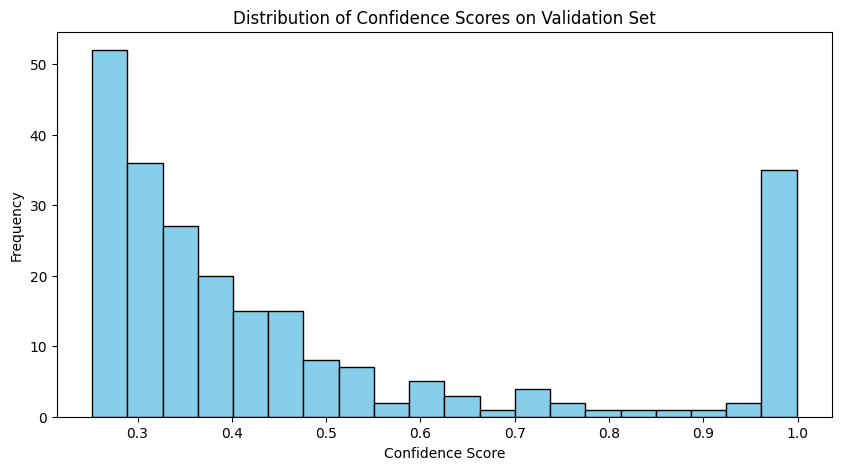

Validation results saved to CSV.


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd

# Directory containing validation images
val_img_dir = '/content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val'
val_images = os.listdir(val_img_dir)

# Initialize a list to store results
results_data = []

# Run inference on each validation image and collect data
for img_name in val_images:
    image_path = os.path.join(val_img_dir, img_name)
    results = model.predict(image_path)

    for result in results:
        for box in result.boxes:
            # Collect relevant information for each box prediction
            confidence = box.conf.item()  # Confidence score
            class_id = box.cls.item()  # Predicted class
            x1, y1, x2, y2 = box.xyxy[0].tolist()  # Bounding box coordinates

            # Append data to the list
            results_data.append({
                "Image Name": img_name,
                "Class ID": class_id,
                "Confidence": confidence,
                "Bounding Box": [x1, y1, x2, y2]
            })

# Convert the results data into a DataFrame for easy analysis
df_results = pd.DataFrame(results_data)

# Display DataFrame to analyze
print("Inference Results on Validation Set:")
print(df_results)

# Plot the distribution of confidence scores for further analysis
plt.figure(figsize=(10, 5))
plt.hist(df_results["Confidence"], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Confidence Scores on Validation Set")
plt.xlabel("Confidence Score")
plt.ylabel("Frequency")
plt.show()

# Save results to CSV for offline analysis
df_results.to_csv('/content/drive/My Drive/Colab Notebooks/Project_AI/validation_results.csv', index=False)
print("Validation results saved to CSV.")


In [ ]:
model.train(
    data='/content/drive/My Drive/Colab Notebooks/Project_AI/data/yolo_config.yaml',  # Path to the YAML config file
    epochs=50,
    batch=8,
    imgsz=320
)


Ultralytics 8.3.12 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/My Drive/Colab Notebooks/Project_AI/data/yolo_config.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False

train: Scanning /content/drive/My Drive/Colab Notebooks/Project_AI/data/labels/train.cache... 71 images, 0 backgrounds, 21 corrupt: 100%|██████████| 71/71 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/train/BA_Knights_HIll_FM_Mast_00001.jpg: ignoring corrupt image/label: negative label values [  -0.032713    -0.30449   -0.010331]
train: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/train/BA_Knights_HIll_FM_Mast_00011.jpg: ignoring corrupt image/label: negative label values [  -0.046424   -0.055638]
train: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/train/BA_Knights_HIll_FM_Mast_00013.jpg: ignoring corrupt image/label: negative label values [  -0.050837]
train: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/train/BA_Knights_HIll_FM_Mast_00016.jpg: ignoring corrupt image/label: negative label values [  -0.056575   -0.071603]
train: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/train/BA_Knights_HIll_FM_Mast_00018.jpg: ignoring corrupt image/label: negative label values [    -0.0306]
train: WARNI


val: Scanning /content/drive/My Drive/Colab Notebooks/Project_AI/data/labels/val.cache... 38 images, 0 backgrounds, 9 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val/BA_Knights_HIll_FM_Mast_00011.jpg: ignoring corrupt image/label: negative label values [  -0.046424   -0.055638]
val: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val/BA_Knights_HIll_FM_Mast_00013.jpg: ignoring corrupt image/label: negative label values [  -0.050837]
val: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val/BA_Knights_HIll_FM_Mast_00020.jpg: ignoring corrupt image/label: negative label values [  -0.064768    -0.62772   -0.056503    -0.99625]
val: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val/BA_Knights_HIll_FM_Mast_00021.jpg: ignoring corrupt image/label: negative label values [  -0.018939   -0.034591]
val: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val/BA_Knights_HIll_FM_Mast_00023.jpg: ignoring corrupt image/label: negative label values [  -0.051834    -0.46432]
val: WAR

Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      0.43G      3.635      2.639      2.451         21        320: 100%|██████████| 7/7 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all         29        267     0.0703      0.417     0.0964     0.0229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50     0.388G      3.669      2.635      2.447         35        320: 100%|██████████| 7/7 [00:01<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]

                   all         29        267    0.00832        0.5     0.0818     0.0399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50     0.371G      3.256      2.411      2.287         19        320: 100%|██████████| 7/7 [00:01<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         29        267     0.0093        0.5     0.0898     0.0393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50     0.394G      2.952      2.185      2.155         14        320: 100%|██████████| 7/7 [00:01<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]

                   all         29        267     0.0115      0.515      0.168     0.0852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50     0.392G      2.778      2.102      2.049         49        320: 100%|██████████| 7/7 [00:01<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         29        267     0.0141      0.538      0.173     0.0917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50     0.398G       2.63      1.961      1.952         36        320: 100%|██████████| 7/7 [00:01<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all         29        267     0.0163       0.56      0.192      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50     0.392G      2.558      1.958      1.889         35        320: 100%|██████████| 7/7 [00:01<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]


                   all         29        267      0.693     0.0666      0.216      0.122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50     0.392G      2.443      1.853      1.841         33        320: 100%|██████████| 7/7 [00:01<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         29        267      0.569      0.212      0.371      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50     0.371G       2.33      1.782      1.763         55        320: 100%|██████████| 7/7 [00:01<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         29        267      0.668      0.379      0.449      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50     0.392G       2.33      1.763      1.743         51        320: 100%|██████████| 7/7 [00:01<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]


                   all         29        267      0.685       0.44      0.513      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50     0.373G      2.184      1.769      1.729         30        320: 100%|██████████| 7/7 [00:01<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.89it/s]

                   all         29        267      0.592      0.573      0.535      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50     0.392G      2.234      1.753      1.677         53        320: 100%|██████████| 7/7 [00:01<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         29        267      0.609      0.577      0.542      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50     0.392G      2.161      1.625       1.63         37        320: 100%|██████████| 7/7 [00:01<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]

                   all         29        267      0.599      0.617       0.56      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50     0.371G      1.942      1.547      1.539         49        320: 100%|██████████| 7/7 [00:01<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.40it/s]

                   all         29        267      0.599      0.617       0.56      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50     0.394G       2.06      1.665      1.593         41        320: 100%|██████████| 7/7 [00:01<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.15it/s]


                   all         29        267      0.614      0.623      0.563      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50     0.394G      2.033      1.527      1.547         44        320: 100%|██████████| 7/7 [00:01<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.95it/s]

                   all         29        267      0.608      0.619      0.565      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50     0.394G      1.999      1.604      1.555         17        320: 100%|██████████| 7/7 [00:01<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.41it/s]

                   all         29        267      0.622      0.625      0.572      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.392G      2.029      1.601      1.617         19        320: 100%|██████████| 7/7 [00:01<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.83it/s]

                   all         29        267      0.645      0.612      0.575      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50     0.373G      1.941      1.567      1.543         31        320: 100%|██████████| 7/7 [00:01<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.37it/s]

                   all         29        267      0.629      0.617      0.578      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50     0.373G      1.899      1.487      1.505         22        320: 100%|██████████| 7/7 [00:00<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.41it/s]

                   all         29        267       0.62      0.631      0.584       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50     0.386G      1.848      1.486      1.486         29        320: 100%|██████████| 7/7 [00:00<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.53it/s]

                   all         29        267      0.646      0.629      0.598      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50     0.394G      1.979      1.497      1.477         59        320: 100%|██████████| 7/7 [00:00<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.33it/s]

                   all         29        267      0.646      0.629      0.598      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50     0.392G      1.935      1.558      1.533         13        320: 100%|██████████| 7/7 [00:00<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]


                   all         29        267      0.657      0.644      0.603      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50     0.386G      1.883      1.458      1.472         21        320: 100%|██████████| 7/7 [00:00<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.35it/s]

                   all         29        267      0.656       0.64      0.602      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50     0.373G      1.878      1.517      1.502         27        320: 100%|██████████| 7/7 [00:00<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.58it/s]

                   all         29        267      0.653      0.633      0.606      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50     0.386G      1.847      1.498      1.455         38        320: 100%|██████████| 7/7 [00:00<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.97it/s]

                   all         29        267      0.635      0.646       0.61      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50     0.394G      1.791      1.345      1.415         23        320: 100%|██████████| 7/7 [00:00<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.25it/s]

                   all         29        267      0.632      0.657      0.614      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.386G      1.808      1.392      1.424         19        320: 100%|██████████| 7/7 [00:00<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.51it/s]

                   all         29        267      0.637      0.653      0.619      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50     0.394G      1.781      1.327      1.468         33        320: 100%|██████████| 7/7 [00:00<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         29        267      0.645      0.637      0.616      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50     0.394G      1.794      1.363      1.412         53        320: 100%|██████████| 7/7 [00:00<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]

                   all         29        267      0.645      0.637      0.616      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50     0.394G      1.849      1.397      1.464         14        320: 100%|██████████| 7/7 [00:01<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.84it/s]

                   all         29        267      0.659      0.642      0.628      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50     0.388G      1.765      1.346      1.406         42        320: 100%|██████████| 7/7 [00:01<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]

                   all         29        267      0.685      0.642      0.629      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50     0.392G      1.691      1.308      1.375         35        320: 100%|██████████| 7/7 [00:00<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]

                   all         29        267      0.684       0.64      0.633       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50     0.394G      1.758      1.321      1.416         35        320: 100%|██████████| 7/7 [00:00<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.16it/s]

                   all         29        267      0.667      0.653      0.633      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50     0.392G      1.689      1.304      1.379         32        320: 100%|██████████| 7/7 [00:01<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.57it/s]

                   all         29        267      0.658      0.644      0.638       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50     0.371G      1.682      1.271       1.37         35        320: 100%|██████████| 7/7 [00:00<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         29        267      0.649      0.655       0.64      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50     0.394G      1.684      1.257      1.385         31        320: 100%|██████████| 7/7 [00:00<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         29        267      0.645      0.652      0.637      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50     0.392G      1.721      1.285      1.406         22        320: 100%|██████████| 7/7 [00:00<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.08it/s]

                   all         29        267      0.645      0.652      0.637      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50     0.392G       1.69      1.273      1.373         39        320: 100%|██████████| 7/7 [00:00<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]

                   all         29        267      0.641       0.65      0.644      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50     0.377G      1.699       1.25      1.374         39        320: 100%|██████████| 7/7 [00:00<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.09it/s]

                   all         29        267      0.685      0.638      0.645       0.53


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50     0.377G      1.811       1.61       1.41         25        320: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.82it/s]

                   all         29        267      0.636      0.653       0.65      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50     0.377G      1.774      1.506      1.419         14        320: 100%|██████████| 7/7 [00:01<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.19it/s]


                   all         29        267      0.645      0.655      0.647      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50     0.377G      1.627      1.469      1.316         21        320: 100%|██████████| 7/7 [00:01<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.09it/s]


                   all         29        267       0.62      0.675      0.648      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50     0.377G      1.662      1.473      1.343         18        320: 100%|██████████| 7/7 [00:01<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]

                   all         29        267      0.639      0.672      0.646       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50     0.377G      1.579      1.372      1.341         10        320: 100%|██████████| 7/7 [00:01<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.52it/s]

                   all         29        267      0.649      0.669      0.647      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50     0.377G        1.7       1.57      1.435         11        320: 100%|██████████| 7/7 [00:00<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]

                   all         29        267      0.649      0.669      0.647      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50     0.377G      1.627      1.332      1.356         28        320: 100%|██████████| 7/7 [00:01<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.62it/s]

                   all         29        267       0.67      0.661      0.648      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50     0.377G      1.633      1.408      1.401         18        320: 100%|██████████| 7/7 [00:01<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]

                   all         29        267      0.658      0.661       0.65      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50     0.377G      1.574      1.303      1.299         19        320: 100%|██████████| 7/7 [00:01<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.09it/s]

                   all         29        267      0.647      0.659      0.646       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50     0.377G      1.636      1.375      1.377         16        320: 100%|██████████| 7/7 [00:01<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]

                   all         29        267      0.666      0.655       0.65      0.551



50 epochs completed in 0.052 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 5.6MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.12 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,684,758 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]


                   all         29        267      0.667      0.654      0.651      0.551
                 tower         29         31       0.87          1      0.995      0.976
             corrosion         29        236      0.465      0.309      0.306      0.126
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f2f5f14cbb0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

few files are corrupted. this usually happens with manual annotation. or error during conversion of label.

In [ ]:
metrics = model.val()
print(metrics)


Ultralytics 8.3.12 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,684,758 parameters, 0 gradients, 6.8 GFLOPs


val: Scanning /content/drive/My Drive/Colab Notebooks/Project_AI/data/labels/val.cache... 38 images, 0 backgrounds, 9 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val/BA_Knights_HIll_FM_Mast_00011.jpg: ignoring corrupt image/label: negative label values [  -0.046424   -0.055638]
val: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val/BA_Knights_HIll_FM_Mast_00013.jpg: ignoring corrupt image/label: negative label values [  -0.050837]
val: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val/BA_Knights_HIll_FM_Mast_00020.jpg: ignoring corrupt image/label: negative label values [  -0.064768    -0.62772   -0.056503    -0.99625]
val: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val/BA_Knights_HIll_FM_Mast_00021.jpg: ignoring corrupt image/label: negative label values [  -0.018939   -0.034591]
val: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val/BA_Knights_HIll_FM_Mast_00023.jpg: ignoring corrupt image/label: negative label values [  -0.051834    -0.46432]
val: WAR


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.30s/it]


                   all         29        267       0.67      0.656      0.652       0.55
                 tower         29         31       0.87          1      0.995      0.972
             corrosion         29        236      0.469      0.311      0.309      0.127
Speed: 1.3ms preprocess, 22.5ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train32
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f2f5f4d7730>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,  


image 1/1 /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val/BA_Knights_HIll_FM_Mast_00054.jpg: 256x320 1 tower, 3 corrosions, 41.8ms
Speed: 1.8ms preprocess, 41.8ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 320)

image 1/1 /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val/BA_Knights_HIll_FM_Mast_00031.jpg: 256x320 1 tower, 8 corrosions, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 320)

image 1/1 /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val/BA_Knights_HIll_FM_Mast_00015.jpg: 256x320 1 tower, 4 corrosions, 7.1ms
Speed: 1.9ms preprocess, 7.1ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 320)

image 1/1 /content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val/BA_Knights_HIll_FM_Mast_00019.jpg: 256x320 1 tower, 2 corrosions, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)

image 1/1 /co

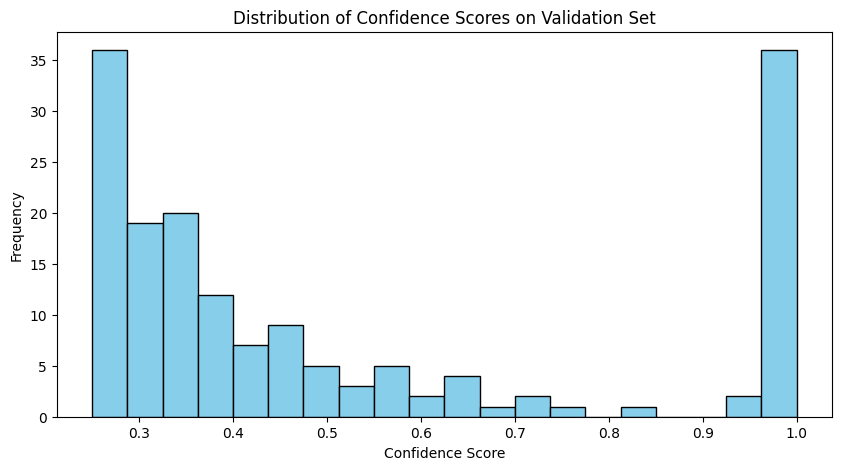

Validation results saved to CSV.


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd

# Directory containing validation images
val_img_dir = '/content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val'
val_images = os.listdir(val_img_dir)

# Initialize a list to store results
results_data = []

# Run inference on each validation image and collect data
for img_name in val_images:
    image_path = os.path.join(val_img_dir, img_name)
    results = model.predict(image_path)

    for result in results:
        for box in result.boxes:
            # Collect relevant information for each box prediction
            confidence = box.conf.item()  # Confidence score
            class_id = box.cls.item()  # Predicted class
            x1, y1, x2, y2 = box.xyxy[0].tolist()  # Bounding box coordinates

            # Append data to the list
            results_data.append({
                "Image Name": img_name,
                "Class ID": class_id,
                "Confidence": confidence,
                "Bounding Box": [x1, y1, x2, y2]
            })

# Convert the results data into a DataFrame for easy analysis
df_results = pd.DataFrame(results_data)

# Display DataFrame to analyze
print("Inference Results on Validation Set:")
print(df_results)

# Plot the distribution of confidence scores for further analysis
plt.figure(figsize=(10, 5))
plt.hist(df_results["Confidence"], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Confidence Scores on Validation Set")
plt.xlabel("Confidence Score")
plt.ylabel("Frequency")
plt.show()

# Save results to CSV for offline analysis
df_results.to_csv('/content/drive/My Drive/Colab Notebooks/Project_AI/validation_results.csv', index=False)
print("Validation results saved to CSV.")


In [ ]:
import os

# List images in validation directory
val_img_dir = '/content/drive/My Drive/Colab Notebooks/Project_AI/data/images/val'
val_images = os.listdir(val_img_dir)

print("Validation images:", val_images)

# Use a real image name from the validation set
image_path = os.path.join(val_img_dir, val_images[0])

# Run inference
results = model.predict(image_path)



Validation images: ['BA_Knights_HIll_FM_Mast_00054.jpg', 'BA_Knights_HIll_FM_Mast_00031.jpg', 'BA_Knights_HIll_FM_Mast_00015.jpg', 'BA_Knights_HIll_FM_Mast_00019.jpg', 'BA_Knights_HIll_FM_Mast_00073.jpg', 'BA_Knights_HIll_FM_Mast_00036.jpg', 'BA_Knights_HIll_FM_Mast_00027.jpg', 'BA_Knights_HIll_FM_Mast_00046.jpg', 'BA_Knights_HIll_FM_Mast_00060.jpg', 'BA_Knights_HIll_FM_Mast_00014.jpg', 'BA_Knights_HIll_FM_Mast_00069.jpg', 'BA_Knights_HIll_FM_Mast_00023.jpg', 'BA_Knights_HIll_FM_Mast_00006.jpg', 'BA_Knights_HIll_FM_Mast_00063.jpg', 'BA_Knights_HIll_FM_Mast_00011.jpg', 'BA_Knights_HIll_FM_Mast_00043.jpg', 'BA_Knights_HIll_FM_Mast_00010.jpg', 'BA_Knights_HIll_FM_Mast_00061.jpg', 'BA_Knights_HIll_FM_Mast_00007.jpg', 'BA_Knights_HIll_FM_Mast_00033.jpg', 'BA_Knights_HIll_FM_Mast_00062.jpg', 'BA_Knights_HIll_FM_Mast_00065.jpg', 'BA_Knights_HIll_FM_Mast_00042.jpg', 'BA_Knights_HIll_FM_Mast_00064.jpg', 'BA_Knights_HIll_FM_Mast_00004.jpg', 'BA_Knights_HIll_FM_Mast_00070.jpg', 'BA_Knights_HIll_F

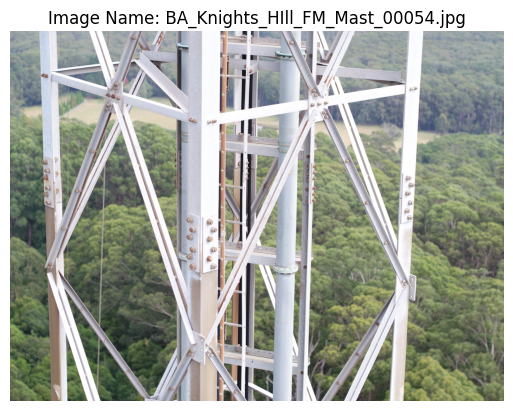

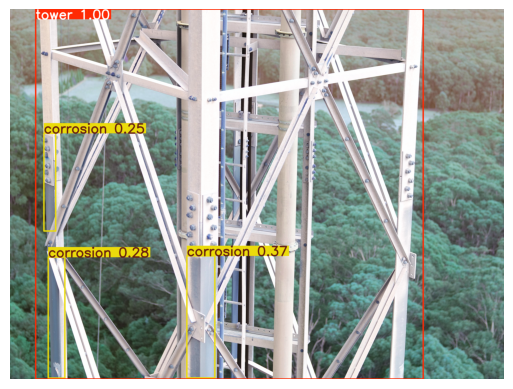

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

# Load and display the image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot original image with predictions overlaid
plt.imshow(image_rgb)
plt.axis('off')
plt.title(f"Image Name: {os.path.basename(image_path)}")
plt.show()

# Plot the prediction overlay
plt.imshow(results[0].plot())
plt.axis('off')
plt.show()


In [ ]:
# Specify the directory where you want to save the model weights
save_dir = '/content/drive/My Drive/Colab Notebooks/Project_AI/model_weights'

# Ensure the directory exists
import os
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

model_path = os.path.join(save_dir, 'best_model.pt')
model.save(model_path)


In [ ]:
# Export model to ONNX or other formats if needed
model.export(format='onnx', imgsz=640, path=save_dir)


SyntaxError: '[31m[1mpath[0m' is not a valid YOLO argument. Similar arguments are i.e. ['batch=16'].

    Arguments received: ['yolo', '-f', '/root/.local/share/jupyter/runtime/kernel-9268fe9c-75f4-40bd-9816-5a351acb65ba.json']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'pose', 'classify', 'segment', 'detect', 'obb'}
                MODE (required) is one of {'export', 'predict', 'track', 'val', 'train', 'benchmark'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo train data=coco8.yaml model=yolo11n.pt epochs=10 lr0=0.01

    2. Predict a YouTube video using a pretrained segmentation model at image size 320:
        yolo predict model=yolo11n-seg.pt source='https://youtu.be/LNwODJXcvt4' imgsz=320

    3. Val a pretrained detection model at batch-size 1 and image size 640:
        yolo val model=yolo11n.pt data=coco8.yaml batch=1 imgsz=640

    4. Export a YOLO11n classification model to ONNX format at image size 224 by 128 (no TASK required)
        yolo export model=yolo11n-cls.pt format=onnx imgsz=224,128
    
    5. Streamlit real-time webcam inference GUI
        yolo streamlit-predict
        
    6. Run special commands:
        yolo help
        yolo checks
        yolo version
        yolo settings
        yolo copy-cfg
        yolo cfg

    Docs: https://docs.ultralytics.com
    Community: https://community.ultralytics.com
    GitHub: https://github.com/ultralytics/ultralytics
     (<string>)